<a href="https://colab.research.google.com/github/sujikathir/Sales-Forecasting/blob/main/Sales%20trend%20using%20ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
#1.Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet
%matplotlib inline
import datetime
import plotly

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
# 2.Load the data
data=pd.read_csv('/content/drive/MyDrive/Sales Dataset 2020.csv')

In [136]:
# 3.Convert the column name (ID) into index
df=data.set_index('ID',drop= True)
df.head()

,Item No.,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17,Nov-17,Dec-17,Jan-18,Feb-18,Mar-18,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,Nov-18,Dec-18,Jan-19,Feb-19,Mar-19,Apr-19,May-19,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Q2-2017,Q3-2017,Q4-2017,Q1-2018,Q2-2018,Q3-2018,Q4-2018,Q1-2019,Q2-2019,Q3-2019,Q4-2019,Q1-2020,Q2-2020,Year-2017,Year-2018,Year-2019,Year-2020,Total Sales,Category
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2613,10697,1081.0,150,4013,2251,4059,6176,2744.0,2667,2668,2331,3695.0,3999,3539.0,2457.0,5605.0,1226.0,2712.0,3434.0,767.0,402.0,727.0,3574.0,200.0,102.0,204.0,2205.0,2711,1942,708.0,1224.0,2101.0,1735.0,1500.0,380.0,767.0,2000.0,826,1231.0,10323,11587.0,8694.0,9995.0,9543.0,4603.0,4501.0,2511.0,5361.0,5060.0,2647.0,2826.0,23141.0,32835.0,17433.0,5473.0,78882.0,1
4264,14300,67.0,11,42,31,90,107,23.0,80,29,56,82.0,31,114.0,32.0,100.0,76.0,50.0,35.0,102.0,20.0,4.0,10.0,60.0,3.0,30.0,77.0,83,15,40.0,110.0,35.0,60.0,42.0,11.0,63.0,120.0,21,78.0,163,210.0,167.0,177.0,226.0,157.0,74.0,110.0,138.0,205.0,116.0,141.0,451.0,727.0,527.0,257.0,1962.0,0
2747,10922,2.0,0,1,8,19,20,34.0,36,24,43,26.0,31,38.0,37.0,34.0,29.0,30.0,28.0,37.0,17.0,34.0,20.0,24.0,8.0,13.0,15.0,12,12,21.0,12.0,13.0,16.0,11.0,7.0,6.0,7.0,2,2.0,28,90.0,93.0,106.0,93.0,82.0,78.0,36.0,45.0,41.0,24.0,9.0,120.0,374.0,200.0,33.0,727.0,0
2746,10921,2.0,2,3,2,5,2,6.0,3,6,5,5.0,10,2.0,4.0,8.0,6.0,5.0,3.0,10.0,6.0,6.0,5.0,2.0,1.0,4.0,7.0,7,1,3.0,5.0,6.0,0.0,2.0,3.0,0.0,2.0,1,4.0,10,11.0,16.0,16.0,19.0,19.0,13.0,12.0,11.0,11.0,5.0,3.0,25.0,70.0,47.0,8.0,150.0,0
3439,12497,1.0,6,102,0,0,0,-2.0,337,16,112,8.0,9,49.0,33.0,0.0,73.0,5.0,16.0,8.0,10.0,23.0,13.0,53.0,25.0,22.0,92.0,970,23,65.0,16.0,110.0,62.0,9.0,87.0,8.0,14.0,1,7.0,102,335.0,136.0,91.0,78.0,34.0,89.0,139.0,1058.0,188.0,104.0,15.0,444.0,339.0,1474.0,119.0,2376.0,0


In [137]:
#4. Create a new DataFrame which has only the monthly sales (Quarterly & Yearly sales are excluded)
df1=df.copy()
df1.drop(df1.iloc[:,38:],axis=1,inplace=True)

df1.head()

,Item No.,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17,Nov-17,Dec-17,Jan-18,Feb-18,Mar-18,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,Nov-18,Dec-18,Jan-19,Feb-19,Mar-19,Apr-19,May-19,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20,Apr-20,May-20
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2613,10697,1081.0,150,4013,2251,4059,6176,2744.0,2667,2668,2331,3695.0,3999,3539.0,2457.0,5605.0,1226.0,2712.0,3434.0,767.0,402.0,727.0,3574.0,200.0,102.0,204.0,2205.0,2711,1942,708.0,1224.0,2101.0,1735.0,1500.0,380.0,767.0,2000.0,826
4264,14300,67.0,11,42,31,90,107,23.0,80,29,56,82.0,31,114.0,32.0,100.0,76.0,50.0,35.0,102.0,20.0,4.0,10.0,60.0,3.0,30.0,77.0,83,15,40.0,110.0,35.0,60.0,42.0,11.0,63.0,120.0,21
2747,10922,2.0,0,1,8,19,20,34.0,36,24,43,26.0,31,38.0,37.0,34.0,29.0,30.0,28.0,37.0,17.0,34.0,20.0,24.0,8.0,13.0,15.0,12,12,21.0,12.0,13.0,16.0,11.0,7.0,6.0,7.0,2
2746,10921,2.0,2,3,2,5,2,6.0,3,6,5,5.0,10,2.0,4.0,8.0,6.0,5.0,3.0,10.0,6.0,6.0,5.0,2.0,1.0,4.0,7.0,7,1,3.0,5.0,6.0,0.0,2.0,3.0,0.0,2.0,1
3439,12497,1.0,6,102,0,0,0,-2.0,337,16,112,8.0,9,49.0,33.0,0.0,73.0,5.0,16.0,8.0,10.0,23.0,13.0,53.0,25.0,22.0,92.0,970,23,65.0,16.0,110.0,62.0,9.0,87.0,8.0,14.0,1


In [138]:
# 5.Forecasting based on ID
n=int(input("Enter the ID number: "))
ID_monthly_sales_list=(df1.loc[n:n,'May-17':].values.T.flatten())
y=ID_monthly_sales_list.tolist()
print()
print("Monthly sales of ID number",n,"is")
print()
print(y)

Enter the ID number: 3439

Monthly sales of ID number 3439 is

[1.0, 6.0, 102.0, 0.0, 0.0, 0.0, -2.0, 337.0, 16.0, 112.0, 8.0, 9.0, 49.0, 33.0, 0.0, 73.0, 5.0, 16.0, 8.0, 10.0, 23.0, 13.0, 53.0, 25.0, 22.0, 92.0, 970.0, 23.0, 65.0, 16.0, 110.0, 62.0, 9.0, 87.0, 8.0, 14.0, 1.0]


In [139]:
# 6.Extracting the Month names
months_list=df.iloc[:,1:38].columns
months_list

Index(['May-17', 'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17',
       'Dec-17', 'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18',
       'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19',
       'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19',
       'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20',
       'Apr-20', 'May-20'],
      dtype='object')

In [140]:
# 7.To convert May-17 into Date format (YYYY:MM:DD)
def custom_parser(x):
    return datetime.datetime.strptime(x,'%b-%y')


date_lst=[]
for i in range(len(months_list)):
    date_lst.append(custom_parser(months_list[i]))

NOTE:
- The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [141]:
# 8.Framing new dataframe with months & monthly sales values of the respective ID
new_dataframe=pd.DataFrame(list(zip(date_lst,y)),columns=['ds','y'])
new_dataframe.head()

,ds,y
0,2017-05-01,1.0
1,2017-06-01,6.0
2,2017-07-01,102.0
3,2017-08-01,0.0
4,2017-09-01,0.0


In [142]:
# 9.Importing FBProphet library
from fbprophet import Prophet

In [143]:
# 10.Importing libraries to use "plotly"
import plotly.offline as py
import plotly.graph_objs as go

In [144]:
# 11.Fitting the model & Making forecasts
m = Prophet(changepoint_prior_scale=2.5)
m.fit(new_dataframe)
future = m.make_future_dataframe(12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [145]:
len(forecast['yhat'])-12


37

In [146]:
len(forecast['yhat'])

49

In [147]:
print('RMSE: %f' % np.sqrt(np.mean((forecast.loc[:len(forecast['yhat']), 'yhat']-new_dataframe['y'])**2)) )

RMSE: 69.710320


In [148]:
# 12.Making all negative values as "0"
x=forecast['yhat']
listed=[]
for i in range(len(x)):
    if x[i]<0:
        x[i]=0
        #listed.append(x)
    #else:x#listed.append(x)
#print(listed)        
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 13.Plotting Actual vs Predicted

In [149]:
py.iplot([
    go.Scatter(x=new_dataframe['ds'], y=new_dataframe['y'], name='Actual'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Predicted'),])
    
    #go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
#])

In [150]:
dff=pd.DataFrame(list(zip(new_dataframe['y'],forecast['yhat'])),columns=['Actual','Predicted'])
dff["MAPE (Mean Absolute Percentage Error)"]=(abs((dff['Actual']-dff['Predicted']))/dff['Actual'])*100
      
dff = dff.apply (pd.to_numeric, errors='coerce') #To drop NaN values

print (dff.dropna(inplace=True))


None


NOTE:
- There are chances that MAPE value could be "infinity",so these values are to be made as "Zero" to find the mean value of the MAPE

In [151]:
lst=dff['MAPE (Mean Absolute Percentage Error)'].tolist()

for i in range(len(lst)):
    if lst[i]==float('inf'):
        lst[i]=0
    
       
#print(lst)
dff['MAPE (Mean Absolute Percentage Error)']=lst
dff

,Actual,Predicted,MAPE (Mean Absolute Percentage Error)
0,1.0,7.274190,627.419018
1,6.0,38.091033,534.850542
2,102.0,0.000000,100.000000
3,0.0,70.410195,0.000000
4,0.0,36.133927,0.000000
5,0.0,36.514477,0.000000
6,-2.0,0.976145,-148.807272
7,337.0,275.543961,18.236213
8,16.0,8.766981,45.206368
9,112.0,52.180257,53.410485


In [152]:
dff['MAPE (Mean Absolute Percentage Error)'].mean()

164.244168119299

In [153]:
dff['MAPE (Mean Absolute Percentage Error)'].mean()/dff['MAPE (Mean Absolute Percentage Error)'].count()

4.439031570791864

In [154]:
dff['MAPE (Mean Absolute Percentage Error)'].count()

37

In [155]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(dff['Actual'],dff['Predicted'])) 



65.01888344394646

In [156]:
len(dff['Actual']) , len(dff['Predicted'])

(37, 37)

In [157]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
mape(dff['Actual'],dff['Predicted'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in true_divide



inf

In [158]:
#!pip install PySimpleGUI

In [159]:
#!pip install PyInstaller

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


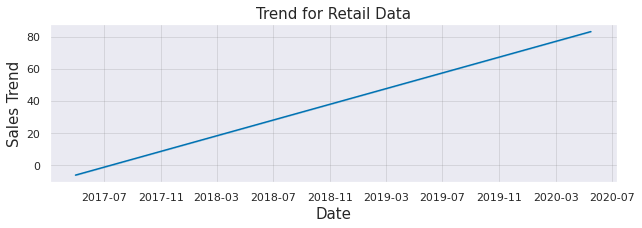

In [160]:
from fbprophet import Prophet


m = Prophet()

m.fit(new_dataframe)
future = m.make_future_dataframe(periods=15)
forecast = m.predict(future)
forecast = forecast[["ds","trend", "trend_lower", "trend_upper"]]
fig = m.plot_components(forecast,plot_cap=False)
trend_ax = fig.axes[0]
trend_ax.plot()
plt.title("Trend for Retail Data", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Sales Trend", fontsize=15)

plt.show()

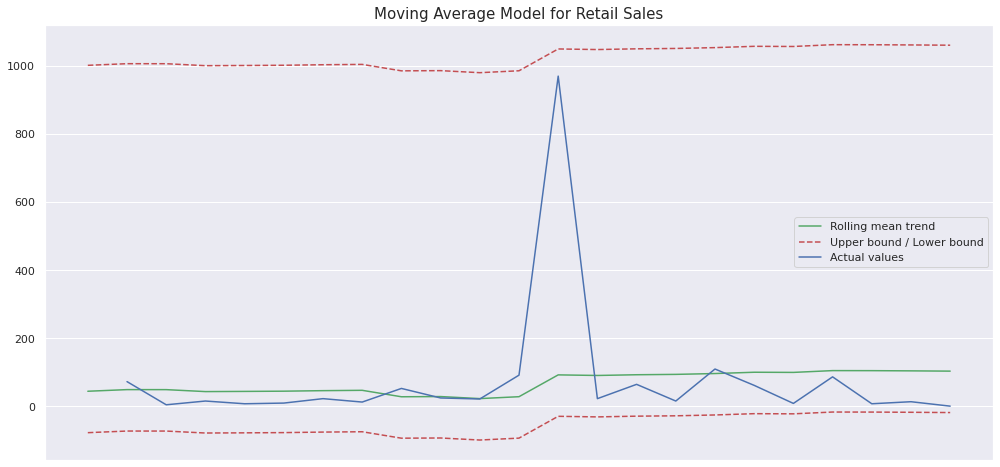

In [192]:
series = new_dataframe.y
window=15


from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

green = sns.color_palette("deep", 8)[2]
blue = sns.color_palette("deep", 8)[0]

rolling_mean = series.rolling(window=window).mean()
fig,ax = plt.subplots(figsize=(17,8))


plt.title('Moving Average Model for Retail Sales',fontsize=15)

plt.plot(rolling_mean, color = green, label='Rolling mean trend')

#Plot confidence intervals for smoothed values
mae = mean_absolute_error(series[window:], rolling_mean[window:])
deviation = np.std(series[window:] - rolling_mean[window:])
lower_bound = rolling_mean - (mae + 0.2 * deviation)
upper_bound = rolling_mean + (mae + 4.5 * deviation)

plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
plt.plot(lower_bound, 'r--')

plt.plot(series[window:], color=blue,label='Actual values')


plt.legend(loc='best')
plt.grid(True)
plt.xticks([])
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation



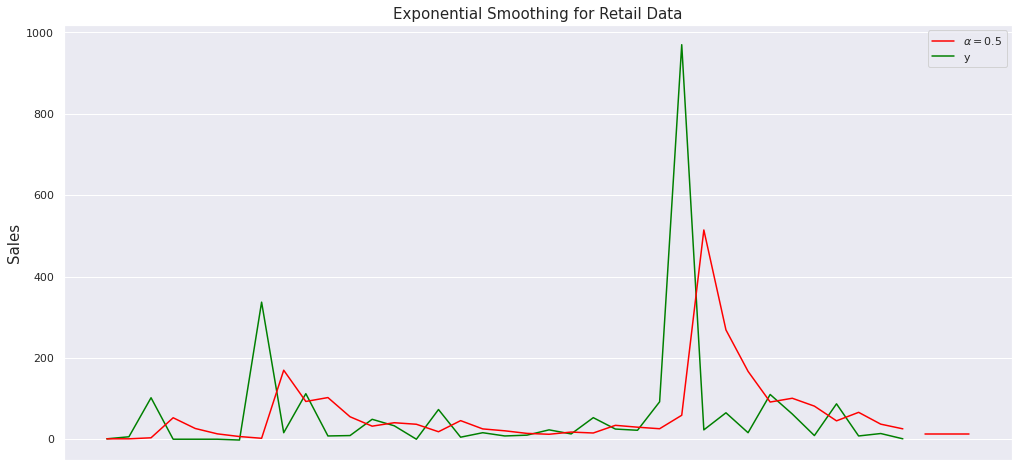

In [162]:
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set()
import pandas as pd

# Put the correct dataframe here!

fit1 = ExponentialSmoothing(new_dataframe['y'][0:200]).fit(smoothing_level=0.1, optimized=False)

fit2 = ExponentialSmoothing(new_dataframe['y'][0:300]).fit(smoothing_level=0.5, optimized=False)

forecast1 = fit1.forecast(3).rename(r'$\alpha=0.01$')
forecast2 = fit2.forecast(3).rename(r'$\alpha=0.5$')
plt.figure(figsize=(17,8))

#forecast1.plot(color='blue', legend=True)
forecast2.plot(color='red', legend=True)
new_dataframe['y'][0:200].plot(marker='',color='green', legend=True)
plt.ylabel("Sales", fontsize=15)

#fit1.fittedvalues.plot(color='blue')
fit2.fittedvalues.plot(color='red')

plt.title("Exponential Smoothing for Retail Data", fontsize=15)
plt.xticks([], minor=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




MSE error: 136135.06507707332


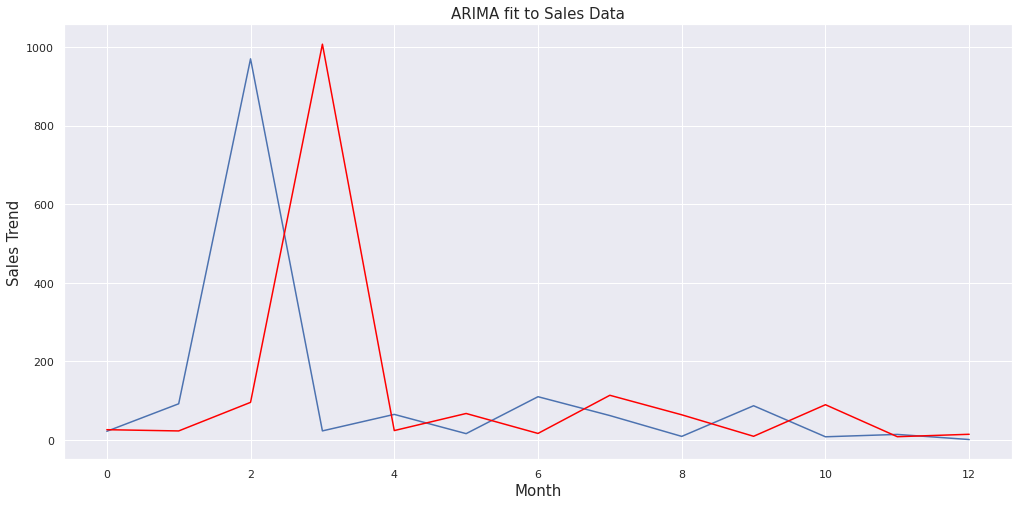

In [184]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



X = new_dataframe['y'].values

split = int(0.66*len(X))
train, test = X[0:split], X[split:]

history = [x for x in train]
predictions = []
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
    
	obs = test[t]
	history.append(obs)
mse = mean_squared_error(test, predictions)

print(f"MSE error: {mse}")

plt.figure(figsize=(17,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.title("ARIMA fit to Sales Data",fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Sales Trend", fontsize=15)
plt.show()

In [177]:
from sklearn.metrics import mean_squared_error
from pandas import read_csv
from pandas import datetime

# parse dates
def custom_parser(x):
	return datetime.strptime(x, '%b-%y')
 
auto_cor = read_csv('/content/drive/MyDrive/altered sales dataset.csv', header=0, index_col=0, date_parser=custom_parser)

auto_cor = pd.DataFrame(auto_cor)
auto_cor.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



,Sales
Month,
2017-05-01,20876.5
2017-06-01,17675.0
2017-07-01,34743.0
2017-08-01,32326.0
2017-09-01,16297.0


In [ ]:
# Split train and test sets in correspondence with Time series data
def ts_train_test_split(X, y, test_size):
    test_index = int(len(X)*(1-test_size))
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

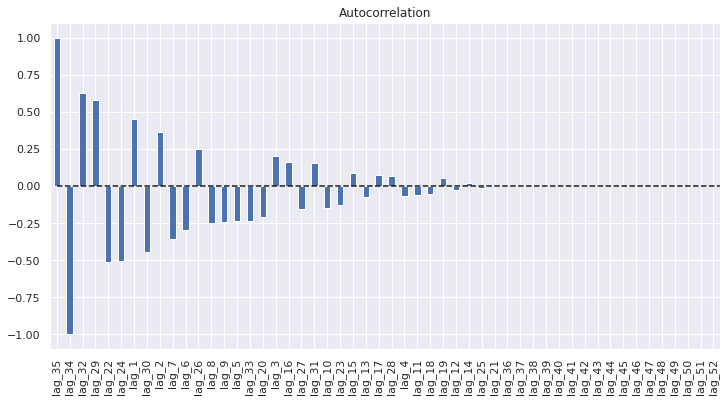

In [176]:
auto_cor.columns = ["y"]

# Adding the lag of the target variable from 1 steps back up to 52 (due to a seasonality at the end of the year)
for i in range(1, 53):
    auto_cor["lag_{}".format(i)] = auto_cor.y.shift(i)

# Compute autocorrelation of the series and its lags
lag_corr = auto_cor.corr()
lag_corr = lag_corr.iloc[1:,0]
lag_corr.columns = ["corr"]
order = lag_corr.abs().sort_values(ascending = False)
lag_corr = lag_corr[order.index]

# Plot the Autocorrelation
plt.figure(figsize=(12, 6))
lag_corr.plot(kind='bar')
plt.grid(True, axis='y')
plt.title("Autocorrelation")
plt.hlines(y=0, xmin=0, xmax=len(lag_corr), linestyles='dashed')



In [165]:
!pip install pmdarima

In [166]:
data = series.values

In [167]:
data = series.values
import pmdarima as pm 
stepwise_model = pm.auto_arima(data, start_p=1, start_q=1,
                               max_p=20, max_q=20, m=30,
                               start_P=0, seasonal=True,
                               d=1, D=1, trace=True,
                               error_action='ignore',  
                               suppress_warnings=True, 
                               stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[30]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(0,1,0)[30]             : AIC=74.659, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[30]             : AIC=inf, Time=1.52 sec
 ARIMA(0,1,1)(0,1,1)[30]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(1,1,0)[30]             : AIC=inf, Time=1.00 sec
 ARIMA(0,1,0)(0,1,1)[30]             : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(1,1,1)[30]             : AIC=78.594, Time=1.97 sec
 ARIMA(1,1,0)(0,1,0)[30]             : AIC=74.870, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[30]             : AIC=inf, Time=0.09 sec
 ARIMA(1,1,1)(0,1,0)[30]             : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,1,0)[30] intercept   : AIC=76.480, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,1,0)[30]          
Total fit time: 6.805 seconds
74.65850964065596


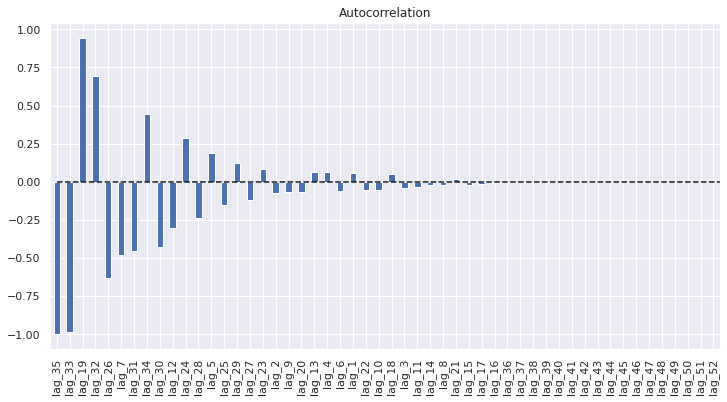

In [168]:
# Compute Residual
pred = stepwise_model.predict(n_periods=13)
train_pred = stepwise_model.predict(n_periods=24)
r_train = train - train_pred
r_test = test - pred
residual = pd.DataFrame(np.concatenate((r_train,r_test)), columns={"y"})


# Generate lag of Residuals from 1 step to 52 steps
# Adding the lag of the target variable from 1 steps back up to 52 
for i in range(1, 53):
    residual["lag_{}".format(i)] = residual.y.shift(i)

# Compute correlation of the Residual series and its lags
lag_corr = residual.corr()
lag_corr = lag_corr.iloc[1:,0]
lag_corr.columns = ["corr"]
order = lag_corr.abs().sort_values(ascending = False)
lag_corr = lag_corr[order.index]

# Plot the Residual Autocorrelation
plt.figure(figsize=(12, 6))
lag_corr.plot(kind='bar')
plt.grid(True, axis='y')
plt.title("Autocorrelation")
plt.hlines(y=0, xmin=0, xmax=len(lag_corr), linestyles='dashed')


Residual mean:  -13.48648648648637


Text(0.5, 1.0, 'Residual Distribution')

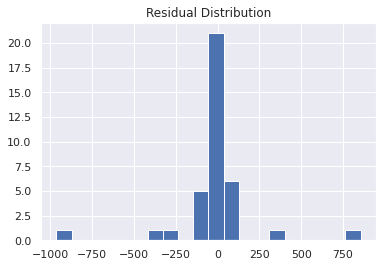

In [169]:

# Plot other Criteria (Distribution, Variance, Residual mean)
# Residual mean and Distribution
print("Residual mean: ",residual.iloc[:,0].mean())
plt.hist(residual.iloc[:,0], bins=20)
plt.title("Residual Distribution")


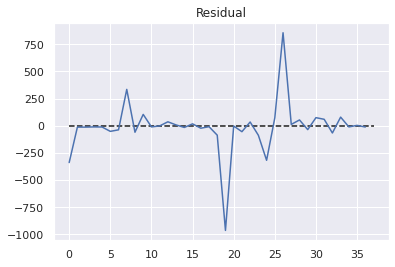

In [170]:
#Residual variance 
plt.plot(residual.iloc[:,0]) 
plt.title("Residual") 
plt.hlines(y=0, xmin=0, xmax=len(residual), linestyles='dashed')
